<a href="https://colab.research.google.com/github/CE0-MOEK/CE0-MOEK/blob/main/REINFORCE_policy_based_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import softmax

In [6]:
grid_word = '/content/state_transitions.csv'
rewards = np.zeros(16)
rewards [3] = 10
rewards [2] = -5
rewards [11] = -5
rewards [8] = -5

terminal_state = 3
state_action_logprobs = np.random.random((16,4))
alpha = 0.005



score_log = []

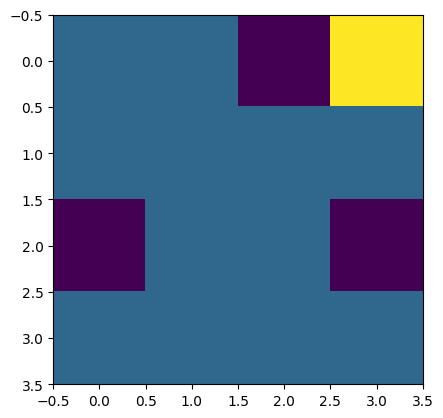

In [7]:
plt.imshow(rewards.reshape(4,4))

In [8]:
state_transition_table = np.genfromtxt(grid_word, delimiter=",").astype(int)

In [9]:
def returns_calc(rewards):
  returns = []
  R = 0
  gamma = 0.9
  for i in reversed(range(len(rewards))):
    R = rewards[i] + gamma * R
    returns.insert(0, R)

    return returns


In [10]:
def test_agent():
  state = 12
  done = False
  steps = 0
  total_rewards = 0
  states_log = []
  while (not(state == terminal_state)) and steps < 100:
    states_log.append(state)
    action = np.argmax(np.random.multinomial(1,softmax(state_action_logprobs[state]), size=1 ))
    state = state_transition_table[state, action]
    steps +=1
  states_log.append(state)
  return total_rewards, states_log

In [11]:
for _ in range(1000):
  state = 12
  state_log = []
  reward_log = []
  action_log = []
  values_log = []
  steps = 0

  while(not(state == terminal_state)) and steps < 100:

    action = np.argmax(np.random.multinomial(1,softmax(state_action_logprobs[state]), size=1 ))
    state_log.append(state)
    action_log.append(action)

    state = state_transition_table[state, action]
    reward_log.append(rewards[state])
    steps +=1

  state_returns = returns_calc(reward_log)
  advantage = np.array(state_returns)

  state_action_logprobs[state_log, action_log] = state_action_logprobs[state_log,action_log] + advantage
  state_action_logprobs = np.clip(state_action_logprobs, -5,5)

  score_log.append(test_agent()[0])





In [12]:
np.max(state_action_logprobs)

5.0

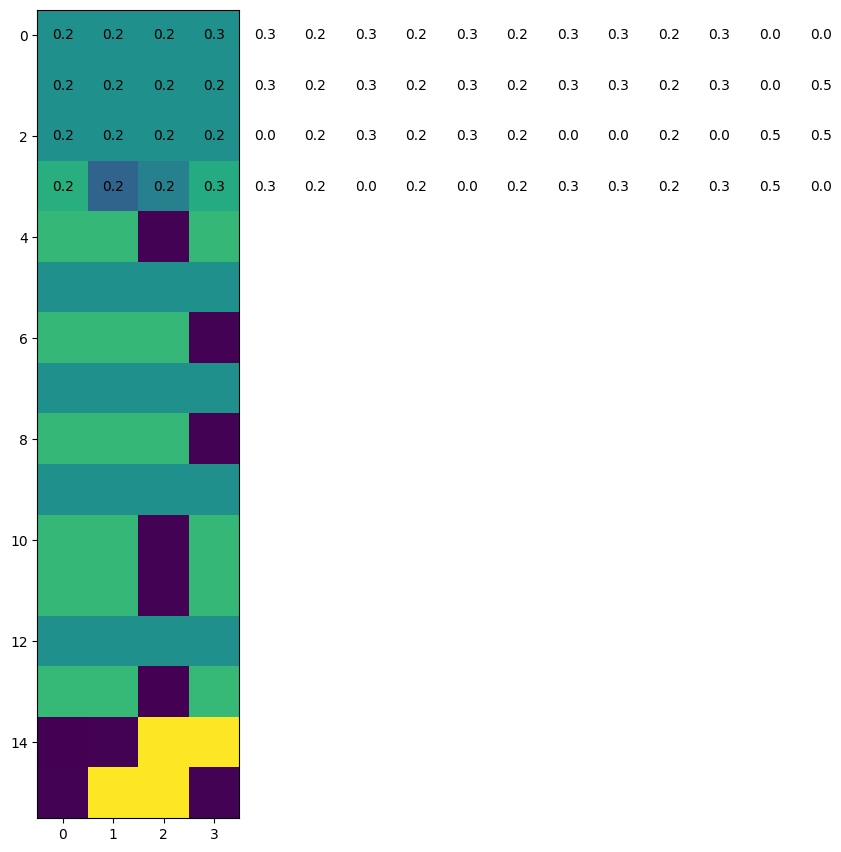

In [13]:
fig, ax1 = plt.subplots(1)
fig.set_size_inches(18.5, 10.5)
ax1.imshow(softmax(state_action_logprobs, 1).reshape(16,4))

for (i,j), label in np.ndenumerate(softmax(state_action_logprobs, 1).reshape(16,4).round(1)):
  ax1.text(i,j,label, ha='center', va='center')

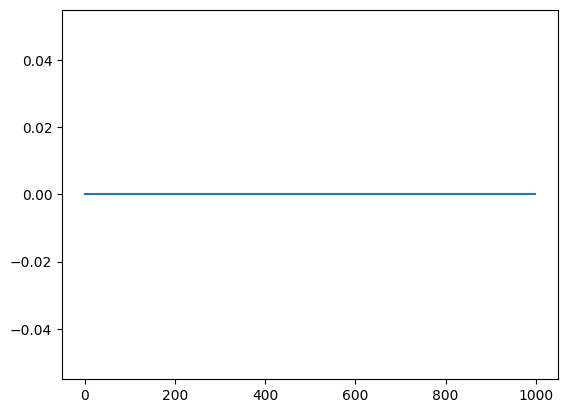

In [14]:
plt.plot(score_log)


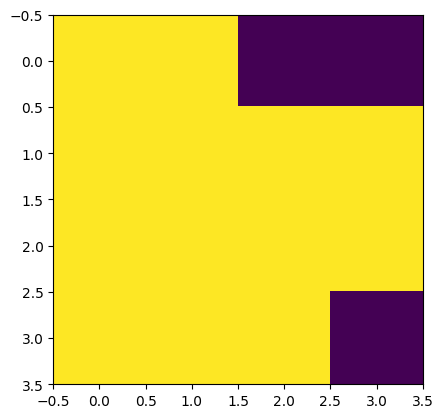

In [15]:
score, state_log = test_agent()
state_view =np.zeros(16)
state_view[state_log]=1
plt.imshow(state_view.reshape(4,4))